<a href="https://colab.research.google.com/github/joshuajacobs2020/AWS-Comprehend-Bias-Project/blob/main/Airbnb_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Data Cleaning

In this file I add new variables to the Kaggle Airbnb Dataset

## Importing Data

In [ ]:
!git clone https://github.com/joshuajacobs2020/AirbnbPricePrediction
%cd AirbnbPricePrediction
! unzip airbnbopendata.zip

Cloning into 'AirbnbPricePrediction'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 16 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (16/16), 10.49 MiB | 14.06 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/AirbnbPricePrediction/AirbnbPricePrediction/AirbnbPricePrediction/AirbnbPricePrediction


In [17]:
import pandas as pd
import numpy as np
df = pd.read_csv("Airbnb_Open_Data.csv")
df.head()

<ipython-input-17-f78297b2d398>:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Airbnb_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


## Cleaning Data

### Cleaning Price data

In [3]:
# Cleaning Price Data
def stripdollars(x):
  x = int(x.strip(" ").strip("$").replace(",",''))
  return x

# Remove NAs and convert to integer
airbnb = df[df["price"].isnull()==False]
airbnb["price"] = airbnb["price"].apply(stripdollars)
airbnb.loc[airbnb["service fee"].isnull(), "service fee"] = "0"
airbnb["service fee"] = airbnb["service fee"].apply(stripdollars)

# Creating total price of price + service fee
airbnb["totprice"] = airbnb["price"] + airbnb["service fee"]
airbnb["service fee"] / airbnb["price"] # Service fees are always 20% of total price

<ipython-input-3-639662e11ce8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb["price"] = airbnb["price"].apply(stripdollars)
<ipython-input-3-639662e11ce8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb["service fee"] = airbnb["service fee"].apply(stripdollars)
<ipython-input-3-639662e11ce8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

0         0.199793
1         0.197183
2         0.200000
3         0.201087
4         0.200980
            ...   
102594    0.200237
102595    0.199522
102596    0.200405
102597    0.199634
102598    0.199612
Length: 102352, dtype: float64

### Cleaning neighborhood data

In [4]:
# Getting boroughs dummies

# Fixing misspellings
airbnb.loc[airbnb["neighbourhood group"]=="brookln", "neighbourhood group"] = "Brooklyn"
airbnb.loc[airbnb["neighbourhood group"]=="manhatan", "neighbourhood group"] = "Manhattan"
airbnb = airbnb[airbnb["neighbourhood group"].isnull()==False]

# Creating Dummies
boroughs = pd.get_dummies(airbnb["neighbourhood group"])
airbnb = airbnb.join(boroughs)

airbnb.groupby("neighbourhood group").size()

airbnb = airbnb.reset_index()

### Adding House Rules Length

This variable takes measures the length of characters in the house rules variable. We may expect house rules that are longer would be less desirable and charge lower prices.

<Axes: >

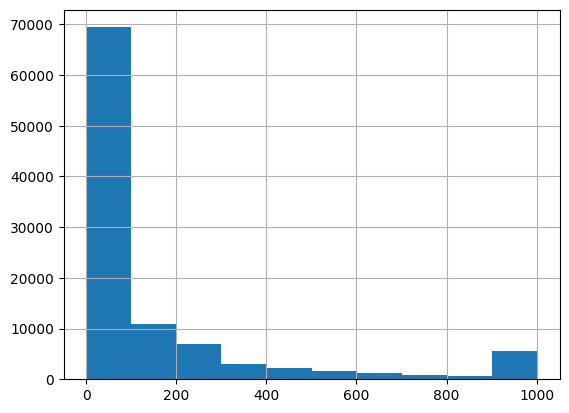

In [5]:
# Variables of house rules
airbnb.loc[airbnb["house_rules"].isnull() == True, "house_rules"] = ""
airbnb.loc[:,"house_rules_length"] = airbnb["house_rules"].apply(len)
airbnb["house_rules_length"].hist()

### Recoding variables

I recode cancellation policies, instant bookability, room types, and neighborhood data into factor variables.

In [6]:
# Factor variable
policy = pd.get_dummies(airbnb["cancellation_policy"], "cancellation")
airbnb = airbnb.join(policy)

In [7]:
# Binary variable
airbnb["instant_bookable_dummy"] = 0
airbnb.loc[airbnb["instant_bookable"]==True, "instant_bookable_dummy"] = 1

In [8]:
# Factor Variable
roomtypes = pd.get_dummies(airbnb["room type"])
airbnb = airbnb.join(roomtypes)

In [9]:
# Coding neighbourhoods into a factor variable
neighbourhoods = pd.get_dummies(airbnb["neighbourhood"])
airbnb = airbnb.join(neighbourhoods)

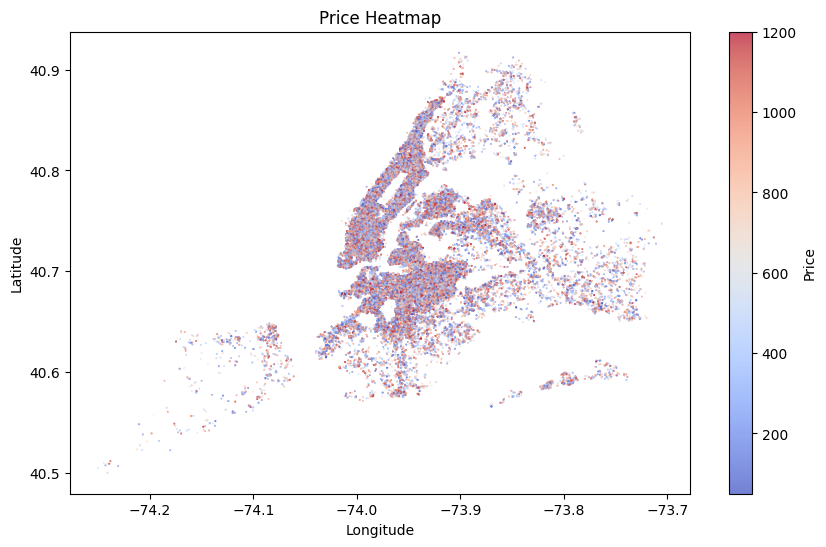

In [10]:
# Example Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(airbnb["long"], airbnb["lat"], c=airbnb["price"], cmap='coolwarm', alpha=0.7, s = .1)
plt.colorbar(label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Price Heatmap')
plt.grid(False)
plt.show()

## Extracting Name Data Variables

The types of words listed in the `NAME` variable would likely correspond to the quality of the listing. We can try to extract the most common, meaningful words used and see if they predict prices.

Since this will generate a high-dimensional dataset, we can attempt to reduce the dimensionality of these by applying PLS or PCA. We may seek to use cross-validation to test which method to use.

In [11]:
# Collecting counts of all words used for listings
from collections import Counter
import string

names_counter = Counter()
for words in airbnb["NAME"]:
  words = str(words).lower()
  words = ''.join([char for char in words if char not in string.punctuation])
  for word in str(words).split(' '):
      names_counter[word] += 1

names = list(names_counter.keys())
counts = list(names_counter.values())

text_counts = {"names": names, "counts": counts}
text_df = pd.DataFrame(text_counts)

In [12]:
# Getting rid of obviously trivial words
bad_names = ["and","AND","by","the",""," ","","UNTITLED","or","For","for","OF", "MY","My","an", "4"]

# Filtering text to high frequency, non-trivial words
freq_lim = 1000 # determines how often words have to be used to be included
text_filter = text_df.loc[text_df['counts'] > freq_lim,]
text_filter = text_filter[~text_filter["names"].isin(bad_names)]
text_filter

,names,counts
0,clean,2283
2,quiet,2514
3,apt,9335
4,home,4059
7,park,6364
...,...,...
567,bushwick,2691
572,away,1086
610,bedstuy,1146
670,minutes,1038


In [13]:
# Create filtered names from acceptable names
airbnb_text = airbnb[["id","NAME","price"]]
airbnb_text["NAME"] = airbnb_text["NAME"].str.lower()

def filter_words(text):
    return ' '.join([word for word in str(text).split(' ') if word in list(text_filter["names"])])

# Apply the function to the 'text' column
airbnb_text['filtered_text'] = airbnb_text['NAME'].apply(filter_words)

airbnb_text

<ipython-input-13-c8ca9f06552f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_text["NAME"] = airbnb_text["NAME"].str.lower()
<ipython-input-13-c8ca9f06552f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_text['filtered_text'] = airbnb_text['NAME'].apply(filter_words)


,id,NAME,price,filtered_text
0,1001254,clean & quiet apt home by the park,966,clean quiet apt home park
1,1002102,skylit midtown castle,142,midtown
2,1002403,the village of harlem....new york !,620,village of york
3,1002755,NaN,368,
4,1003689,entire apt: spacious studio/loft by central park,204,entire spacious central park
...,...,...,...,...
102319,6092437,spare room in williamsburg,844,room in williamsburg
102320,6092990,best location near columbia u,837,best location near
102321,6093542,"comfy, bright room in brooklyn",988,bright room in brooklyn
102322,6094094,big studio-one stop from midtown,546,big from midtown


In [ ]:
# Create empty rows
for word in text_filter["names"]:
    airbnb_text[word] = 0

In [15]:
# Update the columns with 1 if the word is in the text
for idx, row in airbnb_text.iterrows():
  for word in row['filtered_text'].split(' '):
      airbnb_text.at[idx, word] = 1

airbnb_text = airbnb_text.drop("",axis=1)

airbnb_text

<ipython-input-15-02736eb7f463>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_text.at[idx, word] = 1


,id,NAME,price,filtered_text,clean,quiet,apt,home,park,midtown,...,train,comfortable,astoria,gorgeous,min,bushwick,away,bedstuy,minutes,jfk
0,1001254,clean & quiet apt home by the park,966,clean quiet apt home park,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1002102,skylit midtown castle,142,midtown,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1002403,the village of harlem....new york !,620,village of york,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1002755,NaN,368,,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1003689,entire apt: spacious studio/loft by central park,204,entire spacious central park,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102319,6092437,spare room in williamsburg,844,room in williamsburg,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102320,6092990,best location near columbia u,837,best location near,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102321,6093542,"comfy, bright room in brooklyn",988,bright room in brooklyn,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102322,6094094,big studio-one stop from midtown,546,big from midtown,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Now that the text dummy variables have been created, I attempt to reduce the dimensionality using PCR and PLS.

In [19]:
# Make array of values and reduce dimensionality with PCR
text_array = np.array(airbnb_text.drop(["id","NAME","price","filtered_text"],axis=1))

import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(text_array)
reduced = pca.fit_transform(text_array)
reduced_df_pca = pd.DataFrame(data=reduced,columns=["textfeat1","textfeat2"])

In [22]:
# Alternatively: Use PLS Regression
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_validate

# Running PLS
pls_model = PLSRegression(n_components = 2)
pls_model.fit(text_array, airbnb["price"])

comp = pls_model.transform(text_array)
reduced_df_pls = pd.DataFrame(data=comp,columns=["textfeat1","textfeat2"])

## Testing Models - OLS and Lasso

Below I do preliminary tests to see whether our data appears to be predictive of price.

In [27]:
# Split trianing and test data
from sklearn.model_selection import train_test_split

# Merging PLS text variables
airbnb = airbnb.join(reduced_df_pls)
df = airbnb[["price","textfeat1","textfeat2","Bronx", "Manhattan","Queens","Staten Island"]]
df = df.dropna()

# Splitting test and training
split_data = train_test_split(df, random_state = 1, test_size = .2)
training = split_data[0]
test = split_data[1]

# Splitting into x and y
y_train = np.float64(training["price"])
X_train = np.float64(training.drop("price",axis=1))

y_test = np.float64(test["price"])
X_test = np.float64(test.drop("price",axis=1))

print("Training obs: {}".format(training.shape[0]))
print("Test obs: {}".format(test.shape[0]))

Training obs: 81859
Test obs: 20465


Below `x1` and `x2` correspond to the text features

In [30]:
# Model using all data, use Brooklyn as base case
import statsmodels.api as sm
X_test = sm.add_constant(X_test)
model = sm.OLS(y_test,X_test, missing="drop")
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.081
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           9.68e-09
Time:                        21:21:54   Log-Likelihood:            -1.4775e+05
No. Observations:               20465   AIC:                         2.955e+05
Df Residuals:                   20458   BIC:                         2.956e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        623.2386      3.690    168.882      0.000     616.005     630.472
x1           -13.8017      2.243     -6.152      0.000     -18.199      -9.404
x2             4.2923      2.016      2.129      0.033       0.340       8.244
x3            10.6682     14.670      0.727      0.467     -18.085      39.422
x4             2.1713      5.251      0.413      0.679      -8.122      12.465
x5            16.7723      7.493      2.238      0.025       2.085      31.460
x6           -10.1570     25.055     -0.405      0.685     -59.267      38.953
==============================================================================
Omnibus:                    16293.742   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1205.510
Skew:                          -0.005   Prob(JB):                    1.69e-262
Kurtosis:                       1.811   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Below I try using all the data we have in an OLS regression to see the results.

In [33]:
# Model using all data, use Brooklyn as base case
import statsmodels.api as sm
Y = airbnb["totprice"]
X = airbnb[["Bronx", "Manhattan","Queens","Staten Island", "Construction year", "minimum nights",
            "reviews per month", "availability 365", "review rate number", "house_rules_length",
            "cancellation_moderate","cancellation_strict", "instant_bookable_dummy",
            "Hotel room", "Private room", "Shared room","textfeat1","textfeat2"]] # Use Brooklyn as the base, cancellation flexible as base, home/apt as base
X = X.join(pd.get_dummies(airbnb["neighbourhood"]))
X = sm.add_constant(X)
X = X.drop('Allerton', axis=1) # Allerton is base
model = sm.OLS(Y,X, missing="drop")
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               totprice   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.169
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           1.53e-22
Time:                        21:23:36   Log-Likelihood:            -6.3327e+05
No. Observations:               85554   AIC:                         1.267e+06
Df Residuals:                   85315   BIC:                         1.269e+06
Df Model:                         238                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1469.5716    502.336      2.925      0.003     484.997    2454.146
Bronx                        -52.1966    167.735     -0.311      0.756    -380.957     276.563
Manhattan                     16.1416    220.999      0.073      0.942    -417.014     449.297
Queens                      -120.2623    159.457     -0.754      0.451    -432.796     192.272
Staten Island               -140.6343    160.386     -0.877      0.381    -454.990     173.721
Construction year             -0.2946      0.236     -1.247      0.212      -0.758       0.168
minimum nights                -0.0539      0.049     -1.096      0.273      -0.150       0.042
reviews per month              0.7379      0.808      0.913      0.361      -0.846       2.321
availability 365               0.0003      0.010      0.031      0.975      -0.020       0.021
review rate number            -2.2497      1.062     -2.118      0.034      -4.332      -0.168
house_rules_length            -0.0104      0.005     -1.953      0.051      -0.021    3.75e-05
cancellation_moderate         -2.3323      3.329     -0.701      0.484      -8.857       4.193
cancellation_strict           -1.5998      3.335     -0.480      0.631      -8.136       4.937
instant_bookable_dummy        -0.5139      2.720     -0.189      0.850      -5.845       4.817
Hotel room                    51.1571     37.502      1.364      0.173     -22.346     124.660
Private room                   4.8743      2.907      1.677      0.094      -0.823      10.572
Shared room                   11.2599      9.986      1.128      0.259      -8.312      30.832
textfeat1                    -14.4558      1.353    -10.681      0.000     -17.109     -11.803
textfeat2                      3.9220      1.273      3.081      0.002       1.427       6.417
Arden Heights                238.3145    131.738      1.809      0.070     -19.891     496.520
Arrochar                      12.4050     60.772      0.204      0.838    -106.707     131.517
Arverne                       35.3511     29.383      1.203      0.229     -22.240      92.942
Astoria                        8.6370     14.734      0.586      0.558     -20.241      37.515
Bath Beach                    34.6066    172.646      0.200      0.841    -303.778     372.992
Battery Park City           -128.5304    157.787     -0.815      0.415    -437.792     180.731
Bay Ridge                   -142.1975    164.007     -0.867      0.386    -463.650     179.255
Bay Terrace                  -32.7917    147.682     -0.222      0.824    -322.247     256.664
Bay Terrace, Staten Island  -209.1034    195.648     -1.069      0.285    -592.572     174.365
Baychester                  -214.7379     87.626     -2.451      0.014    -386.484     -42.992
Bayside                      -36.8012     3